In [41]:
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
tit = sns.load_dataset("titanic")
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [43]:
class Zscore:
    
    def __init__(self, columns):
        self.mean = torch.mean(columns)
        self.sigma = torch.std(columns, axis=0)
        
    def get_score(self, x):
        return (x - self.mean)/self.sigma
    
    def get_avarage_score(self, x):
        return torch.mean((x - self.mean)/self.sigma)

In [47]:
age = torch.tensor(tit['age'].values, dtype=torch.float)
fare = torch.tensor(tit['fare'].values, dtype=torch.float)
print(age)

tensor([22.0000, 38.0000, 26.0000, 35.0000, 35.0000,     nan, 54.0000,  2.0000,
        27.0000, 14.0000,  4.0000, 58.0000, 20.0000, 39.0000, 14.0000, 55.0000,
         2.0000,     nan, 31.0000,     nan, 35.0000, 34.0000, 15.0000, 28.0000,
         8.0000, 38.0000,     nan, 19.0000,     nan,     nan, 40.0000,     nan,
            nan, 66.0000, 28.0000, 42.0000,     nan, 21.0000, 18.0000, 14.0000,
        40.0000, 27.0000,     nan,  3.0000, 19.0000,     nan,     nan,     nan,
            nan, 18.0000,  7.0000, 21.0000, 49.0000, 29.0000, 65.0000,     nan,
        21.0000, 28.5000,  5.0000, 11.0000, 22.0000, 38.0000, 45.0000,  4.0000,
            nan,     nan, 29.0000, 19.0000, 17.0000, 26.0000, 32.0000, 16.0000,
        21.0000, 26.0000, 32.0000, 25.0000,     nan,     nan,  0.8300, 30.0000,
        22.0000, 29.0000,     nan, 28.0000, 17.0000, 33.0000, 16.0000,     nan,
        23.0000, 24.0000, 29.0000, 20.0000, 46.0000, 26.0000, 59.0000,     nan,
        71.0000, 23.0000, 34.0000, 34.00

In [48]:
# find average value without nan
def get_average(array):
    sum1 = 0
    elements = 0
    for i in array:
        if not torch.isnan(i):
            sum1 += i
            elements += 1
    
    return sum1/elements

# replace nan by average value
def replace_nan_by_average(array, average_number):
    for en, i in enumerate(array):
        if torch.isnan(i):
            array[en] = average_number
            
    return array

# agregate Zscore
def agregate(score1, score2):
    array  = []
    for i,j in zip(score1, score2):
        array.append((i+j)/2)
    return array
        
            

In [50]:
age_average = get_average(age)
age = replace_nan_by_average(age, age_average)
print(age_average)
print(age)
fare_average = get_average(fare)
fare = replace_nan_by_average(fare, fare_average)

tensor(29.6991)
tensor([22.0000, 38.0000, 26.0000, 35.0000, 35.0000, 29.6991, 54.0000,  2.0000,
        27.0000, 14.0000,  4.0000, 58.0000, 20.0000, 39.0000, 14.0000, 55.0000,
         2.0000, 29.6991, 31.0000, 29.6991, 35.0000, 34.0000, 15.0000, 28.0000,
         8.0000, 38.0000, 29.6991, 19.0000, 29.6991, 29.6991, 40.0000, 29.6991,
        29.6991, 66.0000, 28.0000, 42.0000, 29.6991, 21.0000, 18.0000, 14.0000,
        40.0000, 27.0000, 29.6991,  3.0000, 19.0000, 29.6991, 29.6991, 29.6991,
        29.6991, 18.0000,  7.0000, 21.0000, 49.0000, 29.0000, 65.0000, 29.6991,
        21.0000, 28.5000,  5.0000, 11.0000, 22.0000, 38.0000, 45.0000,  4.0000,
        29.6991, 29.6991, 29.0000, 19.0000, 17.0000, 26.0000, 32.0000, 16.0000,
        21.0000, 26.0000, 32.0000, 25.0000, 29.6991, 29.6991,  0.8300, 30.0000,
        22.0000, 29.0000, 29.6991, 28.0000, 17.0000, 33.0000, 16.0000, 29.6991,
        23.0000, 24.0000, 29.0000, 20.0000, 46.0000, 26.0000, 59.0000, 29.6991,
        71.0000, 23.0000

In [51]:
score_calc = Zscore(age)
age_score = score_calc.get_score(age)
age_score



tensor([-0.5921,  0.6384, -0.2845,  0.4077,  0.4077,  0.0000,  1.8690, -2.1304,
        -0.2076, -1.2074, -1.9765,  2.1767, -0.7460,  0.7153, -1.2074,  1.9459,
        -2.1304,  0.0000,  0.1001,  0.0000,  0.4077,  0.3308, -1.1305, -0.1307,
        -1.6689,  0.6384,  0.0000, -0.8229,  0.0000,  0.0000,  0.7923,  0.0000,
         0.0000,  2.7919, -0.1307,  0.9461,  0.0000, -0.6691, -0.8998, -1.2074,
         0.7923, -0.2076,  0.0000, -2.0535, -0.8229,  0.0000,  0.0000,  0.0000,
         0.0000, -0.8998, -1.7458, -0.6691,  1.4845, -0.0538,  2.7150,  0.0000,
        -0.6691, -0.0922, -1.8996, -1.4382, -0.5921,  0.6384,  1.1768, -1.9765,
         0.0000,  0.0000, -0.0538, -0.8229, -0.9767, -0.2845,  0.1770, -1.0536,
        -0.6691, -0.2845,  0.1770, -0.3614,  0.0000,  0.0000, -2.2204,  0.0231,
        -0.5921, -0.0538,  0.0000, -0.1307, -0.9767,  0.2539, -1.0536,  0.0000,
        -0.5152, -0.4383, -0.0538, -0.7460,  1.2537, -0.2845,  2.2536,  0.0000,
         3.1765, -0.5152,  0.3308,  0.33

In [53]:
score_calc = Zscore(fare)
fare_score = score_calc.get_score(fare)
fare_score

tensor([-5.0216e-01,  7.8640e-01, -4.8858e-01,  4.2049e-01, -4.8606e-01,
        -4.7785e-01,  3.9559e-01, -2.2396e-01, -4.2402e-01, -4.2931e-02,
        -3.1200e-01, -1.1378e-01, -4.8606e-01, -1.8699e-02, -4.9000e-01,
        -3.2608e-01, -6.1964e-02, -3.8645e-01, -2.8584e-01, -5.0267e-01,
        -1.2485e-01, -3.8645e-01, -4.8648e-01,  6.6322e-02, -2.2396e-01,
        -1.6435e-02, -5.0267e-01,  4.6444e+00, -4.8950e-01, -4.8917e-01,
        -9.0221e-02,  2.3004e+00, -4.9210e-01, -4.3676e-01,  1.0055e+00,
         3.9836e-01, -5.0258e-01, -4.8606e-01, -2.8584e-01, -4.2184e-01,
        -4.5739e-01, -2.2547e-01, -4.8917e-01,  1.8866e-01, -4.8950e-01,
        -4.8606e-01, -3.3615e-01, -4.9210e-01, -2.1180e-01, -2.8986e-01,
         1.5059e-01, -4.9110e-01,  8.9599e-01, -1.2485e-01,  5.9917e-01,
         6.6322e-02, -4.3676e-01, -5.0258e-01, -8.9634e-02,  2.9573e-01,
        -5.0258e-01,  9.6181e-01,  1.0317e+00, -8.6615e-02, -9.0221e-02,
        -3.4126e-01, -4.3676e-01, -4.8389e-01, -4.8

In [55]:
agregated_score= agregate(age_score, fare_score)

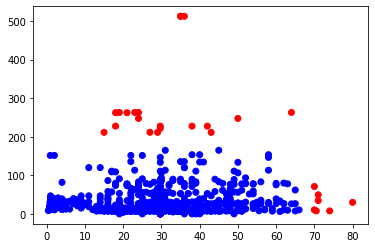

In [56]:
colors = []
for i,j in zip(fare_score, age_score):
    if i > 3 or j > 3:
        colors.append('red')
    else:
        colors.append('blue')
        
plt.scatter(age, fare, color=colors)

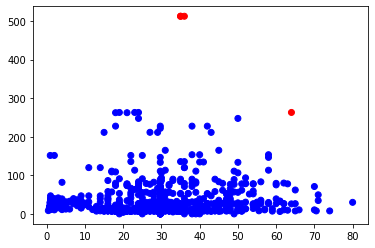

In [57]:
colors = []
for i in agregated_score:
    if i > 3:
        colors.append('red')
    else:
        colors.append('blue')
        
plt.scatter(age, fare, color=colors)

# SURVIVED

In [72]:
survived = tit.query("survived =='1'")
not_survived = tit.query("survived =='0'")

age_not_survived = torch.tensor(not_survived['age'].values, dtype=torch.float)
fare_not_survived = torch.tensor(not_survived['fare'].values, dtype=torch.float)

In [73]:
age_survived = torch.tensor(survived['age'].values, dtype=torch.float)
fare_survived = torch.tensor(survived['fare'].values, dtype=torch.float)

In [74]:
age_average_survived = get_average(age_survived)
age_survived = replace_nan_by_average(age_survived, age_average_survived)

fare_average_survived = get_average(fare_survived)
fare_survived = replace_nan_by_average(fare_survived, fare_average_survived)

In [75]:
score_calc = Zscore(age_survived)
age_survived_score = score_calc.get_score(age_survived)

In [76]:
score_calc = Zscore(fare_survived)
fare_survived_score = score_calc.get_score(fare_survived)

In [81]:
agregated_score_survived = agregate(age_survived_score, fare_survived_score)

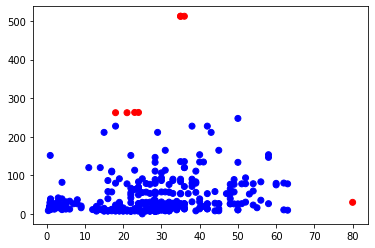

In [78]:
colors = []
for i,j in zip(fare_survived_score, age_survived_score):
    if i > 3 or j > 3:
        colors.append('red')
    else:
        colors.append('blue')
        
plt.scatter(age_survived, fare_survived, color=colors)

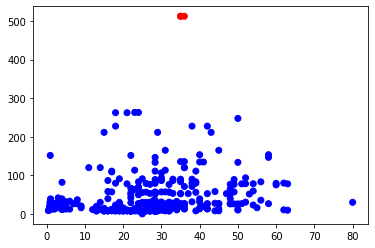

In [82]:
colors = []
for i in agregated_score_survived:
    if i > 3:
        colors.append('red')
    else:
        colors.append('blue')
        
plt.scatter(age_survived, fare_survived, color=colors)

# NOT SURVIVED

In [83]:
age_not_survived = torch.tensor(not_survived['age'].values, dtype=torch.float)
fare_not_survived = torch.tensor(not_survived['fare'].values, dtype=torch.float)

In [84]:
age_average_not_survived = get_average(age_not_survived)
age_not_survived = replace_nan_by_average(age_not_survived, age_average_not_survived)

fare_average_not_survived = get_average(fare_not_survived)
fare_not_survived = replace_nan_by_average(fare_not_survived, fare_average_not_survived)

In [85]:
score_calc = Zscore(age_not_survived)
age_not_survived_score = score_calc.get_score(age_not_survived)

In [86]:
score_calc = Zscore(fare_not_survived)
fare_not_survived_score = score_calc.get_score(fare_not_survived)

In [87]:
agregated_score_not_survived= agregate(age_not_survived_score, fare_not_survived_score)

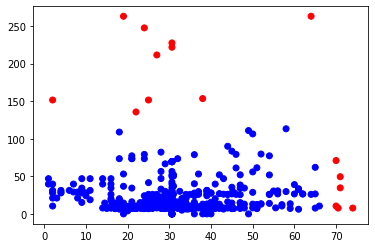

In [88]:
colors = []
for i,j in zip(fare_not_survived_score, age_not_survived_score):
    if i > 3 or j > 3:
        colors.append('red')
    else:
        colors.append('blue')
        
plt.scatter(age_not_survived, fare_not_survived, color=colors)

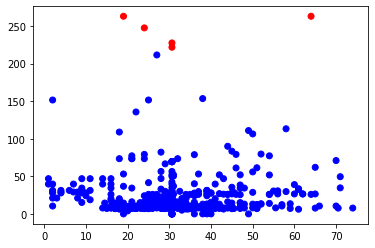

In [89]:
colors = []
for i in agregated_score_not_survived:
    if i > 3:
        colors.append('red')
    else:
        colors.append('blue')
        
plt.scatter(age_not_survived, fare_not_survived, color=colors)